In [1]:
import cv2
import numpy as np
from skimage.measure import label, regionprops
from skimage.color import label2rgb
import matplotlib.pyplot as plt
import sys

In [273]:
input_img = sys.argv[1]
image=cv2.imread('IMG_1697-P.jpg')
image

array([[[136, 147,  91],
        [133, 144,  88],
        [137, 148,  92],
        ...,
        [149, 157,  97],
        [155, 163, 103],
        [160, 168, 108]],

       [[136, 147,  91],
        [133, 144,  88],
        [136, 147,  91],
        ...,
        [151, 159,  99],
        [155, 163, 103],
        [160, 168, 108]],

       [[136, 147,  91],
        [134, 145,  89],
        [135, 146,  90],
        ...,
        [153, 161, 101],
        [156, 164, 104],
        [159, 167, 107]],

       ...,

       [[121, 135,  81],
        [118, 132,  78],
        [115, 129,  75],
        ...,
        [107, 121,  67],
        [100, 114,  60],
        [ 96, 110,  56]],

       [[121, 135,  81],
        [117, 131,  77],
        [114, 128,  74],
        ...,
        [107, 121,  67],
        [100, 114,  60],
        [ 95, 109,  55]],

       [[120, 134,  80],
        [116, 130,  76],
        [113, 127,  73],
        ...,
        [108, 122,  68],
        [101, 115,  61],
        [ 96, 110,  56]]

In [274]:
height, width, channels = image.shape
print (height, width, channels)

1704 2592 3


In [275]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

0716_Ob 1 area: 26673.0
0716_Ob 2 area: 44037.0
0716_Ob 3 area: 8872.0
0716_Ob 4 area: 396401.0
0716_Ob 5 area: 12868.0
0716_Ob 6 area: 25443.0
0716_Ob 7 area: 6588.0
0716_Ob 8 area: 38252.0
0716_Ob 9 area: 9434.0
0716_Ob 10 area: 30712.0
0716_Ob 11 area: 9138.0
0716_Ob 12 area: 10127.0
0716_Ob 13 area: 9109.0
0716_Ob 14 area: 21747.0
0716_Ob 15 area: 13147.0
0716_Ob 16 area: 13078.0
0716_Ob 17 area: 16017.0
0716_Ob 18 area: 9390.0
0716_Ob 19 area: 7583.0
0716_Ob 20 area: 12441.0
0716_Ob 21 area: 4994.0
0716_Ob 22 area: 5344.0


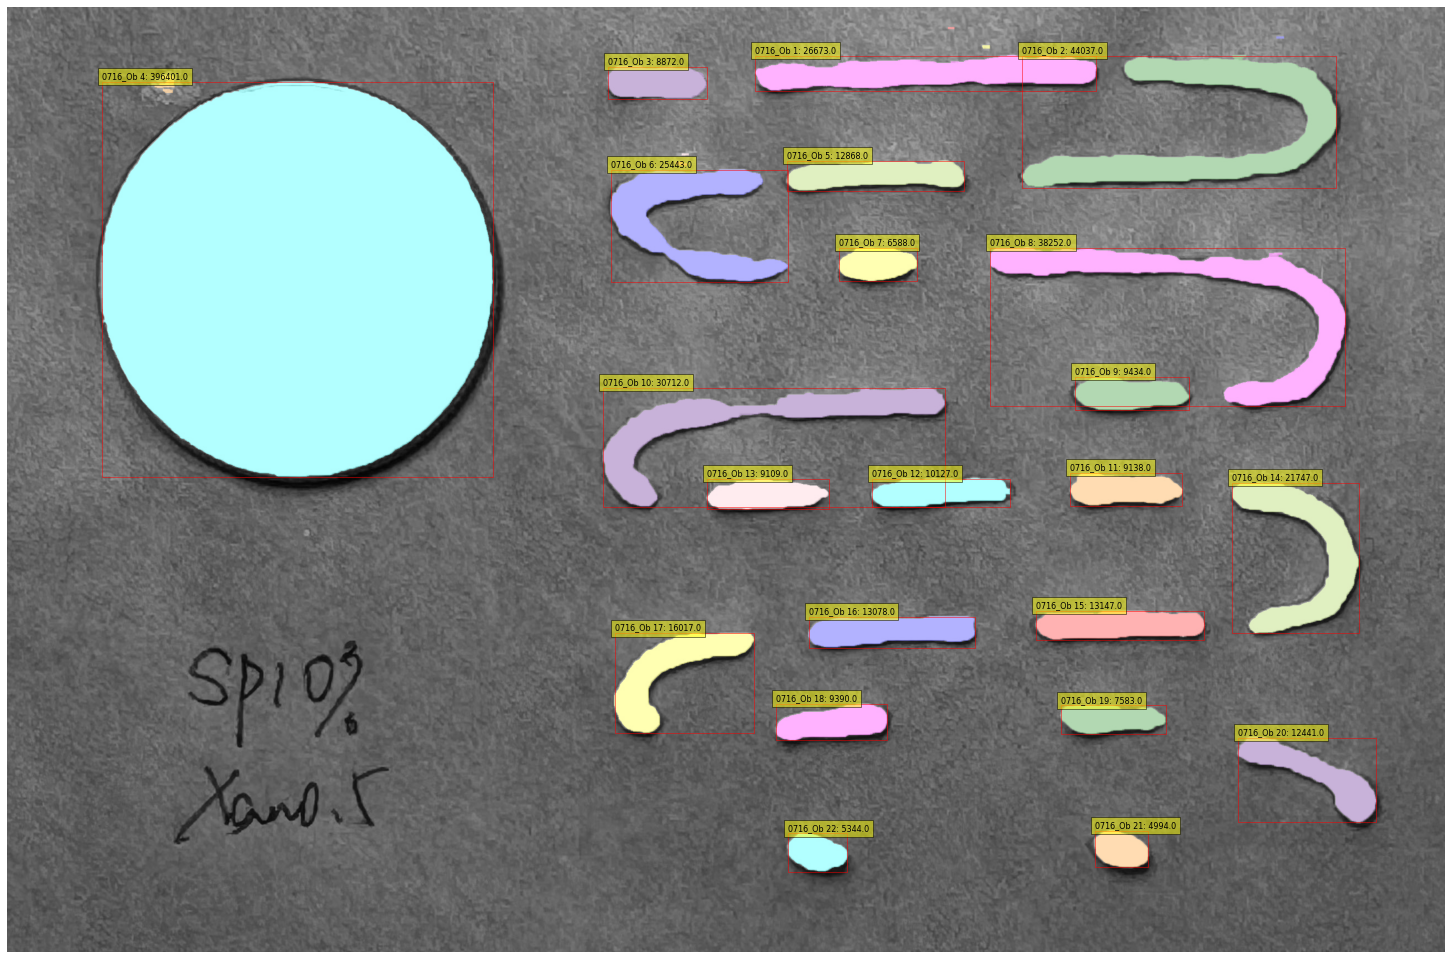

In [276]:
# Initial thresholding
_, binary2 = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Use morphological open to remove small noise
kernel_open = np.ones((4, 12), np.uint8)
binary2 = cv2.morphologyEx(binary2, cv2.MORPH_OPEN, kernel_open)

# Apply morphological closing to merge split parts
kernel_close = np.ones((3, 5), np.uint8)
binary2 = cv2.morphologyEx(binary2, cv2.MORPH_CLOSE, kernel_close)


label_image = label(binary2)
image_label_overlay = label2rgb(label_image, image=image, bg_label=0)

# Get image dimensions and set up figure for visualization
height, width, _ = image.shape
fig, ax = plt.subplots(figsize=(width / 100, height / 100), dpi=72)
ax.imshow(image_label_overlay)
object_counter = 1
for region in regionprops(label_image):
    if region.area > 2000:
        # Get the bounding box coordinates
        minr, minc, maxr, maxc = region.bbox
        object_name = f'0716_Ob {object_counter}'
        object_counter += 1
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=0.5)
        ax.add_patch(rect)
        print(f'{object_name} area: {region.area}')
        ax.text(minc, minr - 5, f'{object_name}: {region.area}', bbox=dict(facecolor='yellow', alpha=0.5), fontsize=8, color='black')
ax.set_axis_off()
plt.savefig('IMG_1697-PP.jpg', dpi=72, bbox_inches='tight', pad_inches=0)
plt.show()